In [28]:
import geopandas as gpd

# Leer el archivo GeoJSON
geojson_path = "..\..\data\provincia\provincia.json"
gdf = gpd.read_file(geojson_path)

# Mostrar las primeras filas del GeoDataFrame
print(gdf.head())

# Verificar geometrías inválidas
invalid_geometries = gdf[~gdf.is_valid]
print(f"Geometrías inválidas:\n{invalid_geometries}")

# Reparar geometrías inválidas usando buffer(0)
gdf["geometry"] = gdf["geometry"].buffer(0)

# Verificar si tiene una geometría válida
if gdf.is_valid.all():
    print("El GeoJSON tiene geometrías válidas.")
else:
    print("El GeoJSON tiene geometrías inválidas.")


   gid  entidad                              fna              gna  \
0    1        0  Ciudad Autónoma de Buenos Aires  Ciudad Autónoma   
1    2        0            Provincia del Neuquén        Provincia   
2    3        0            Provincia de San Luis        Provincia   
3    4        0            Provincia de Santa Fe        Provincia   
4    5        0            Provincia de La Rioja        Provincia   

                               nam in1        fdc  sag  \
0  Ciudad Autónoma de Buenos Aires  02  Geografía  IGN   
1                          Neuquén  58  Geografía  IGN   
2                         San Luis  74  Geografía  IGN   
3                         Santa Fe  82  Geografía  IGN   
4                         La Rioja  46  Geografía  IGN   

                                            geometry  
0  MULTIPOLYGON (((-58.45535 -34.52776, -58.45404...  
1  MULTIPOLYGON (((-70.39341 -36.15624, -70.39333...  
2  MULTIPOLYGON (((-67.05547 -31.85605, -67.05000...  
3  MULTIPOLYGON 

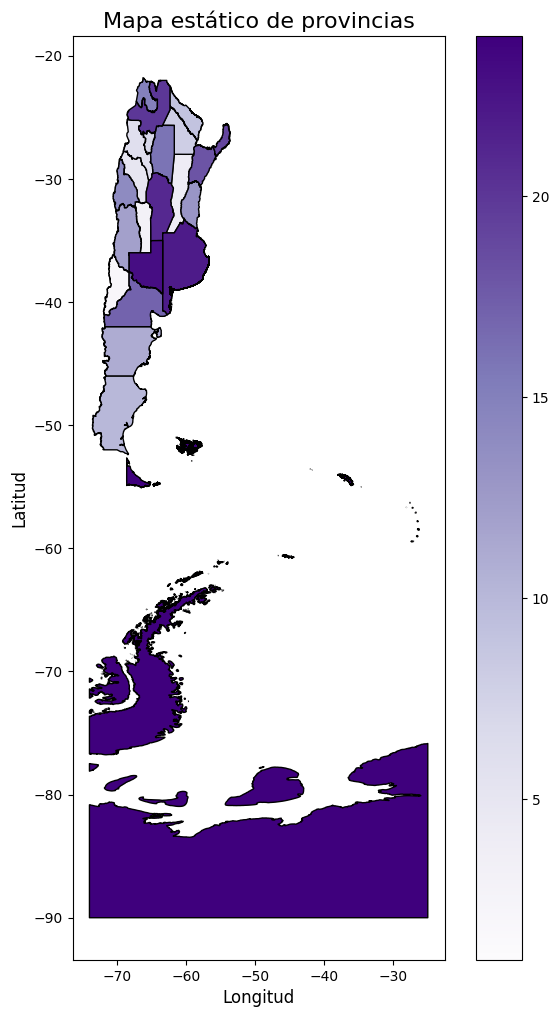

In [44]:
import matplotlib.pyplot as plt


# Crear el gráfico con GeoPandas y Matplotlib
fig, ax = plt.subplots(figsize=(8, 12))
gdf.plot(
    column="gid",           # Columna para colorear
    cmap="Purples",         # Escala de colores
    legend=True,            # Mostrar leyenda
    edgecolor="black",      # Color de bordes
    ax=ax
)

# Personalizar título y ejes
ax.set_title("Mapa estático de provincias", fontsize=16)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

plt.show()


In [22]:
import geopandas as gpd

# Leer el archivo GeoJSON
geojson_path = "..\..\data\pais\pais.json"
gdf = gpd.read_file(geojson_path)

# Mostrar las primeras filas del GeoDataFrame
print(gdf.head())

# Verificar geometrías inválidas
invalid_geometries = gdf[~gdf.is_valid]
print(f"Geometrías inválidas:\n{invalid_geometries}")

# Reparar geometrías inválidas usando buffer(0)
gdf["geometry"] = gdf["geometry"].buffer(0)

# Verificar si tiene una geometría válida
if gdf.is_valid.all():
    print("El GeoJSON tiene geometrías válidas.")
else:
    print("El GeoJSON tiene geometrías inválidas.")

   gid  entidad objeto                  fna        gna        nam fdc  sag  \
0  295        0   País  República Argentina  República  Argentina  -2  IGN   

                                            geometry  
0  MULTIPOLYGON (((-74.00000 -89.00000, -74.00000...  
Geometrías inválidas:
   gid  entidad objeto                  fna        gna        nam fdc  sag  \
0  295        0   País  República Argentina  República  Argentina  -2  IGN   

                                            geometry  
0  MULTIPOLYGON (((-74.00000 -89.00000, -74.00000...  
El GeoJSON tiene geometrías válidas.


In [10]:
import sqlite3
import folium
from folium.plugins import HeatMap
import pandas as pd

# Conectar a la base de datos SQLite
conn = sqlite3.connect('sismos.db')
cursor = conn.cursor()

# Obtener los datos de los sismos actuales
cursor.execute("SELECT latitud, longitud, magnitud FROM sismos WHERE fecha >= '2024-01-01'")
data = cursor.fetchall()

# Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(data, columns=['latitud', 'longitud', 'magnitud'])

# Crear el mapa base centrado en Argentina
m = folium.Map(location=[-38.4161, -63.6167], zoom_start=4)

# Agregar el mapa de calor
heat_data = [[row['latitud'], row['longitud'], row['magnitud']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Guardar el mapa como archivo HTML
m.save('mapa_calor_sismos.html')

# Cerrar la conexión
conn.close()


In [2]:
import sqlite3
import folium
from folium.plugins import HeatMap
import pandas as pd

# Conectar a la base de datos SQLite
conn = sqlite3.connect('..\..\data\sismos.db')
cursor = conn.cursor()

# Obtener los datos de los sismos actuales
cursor.execute("SELECT latitud, longitud, magnitud FROM sismos WHERE fecha >= '2024-01-01'")
data = cursor.fetchall()

# Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(data, columns=['latitud', 'longitud', 'magnitud'])

# Crear el mapa base centrado en Argentina
m = folium.Map(location=[-38.4161, -63.6167], zoom_start=4)

# Agregar el mapa de calor con mayor opacidad (0.5)
heat_data = [[row['latitud'], row['longitud'], row['magnitud']] for index, row in df.iterrows()]
HeatMap(heat_data, max_zoom=13, min_opacity=0.2, radius=15, blur=10, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}).add_to(m)

# Guardar el mapa como archivo HTML
m.save('mapa_calor_sismos_opacidad.html')

# Cerrar la conexión
conn.close()


In [42]:
import folium
from folium.plugins import MarkerCluster
import sqlite3
import pandas as pd

# Conectar a la base de datos SQLite
conn = sqlite3.connect('..\..\data\sismos.db')
cursor = conn.cursor()

# Obtener los datos de los sismos actuales
cursor.execute("SELECT latitud, longitud, magnitud FROM sismos WHERE fecha >= '2020-01-01' and magnitud >= 6.0")
data = cursor.fetchall()

# Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(data, columns=['latitud', 'longitud', 'magnitud'])

# Crear un mapa base centrado en un punto medio
mapa = folium.Map(location=[-36.5, -61.0], zoom_start=5)

# Crear el clúster de marcadores
#marker_cluster = MarkerCluster().add_to(mapa)

# Agregar burbujas al mapa
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["latitud"], row["longitud"]],
        radius=row["magnitud"]*1.5,  # Escalar el radio
        color="darkred",
        fill=True,
        fill_color="red",
        fill_opacity=0.3,
        popup=f"Valor: {row['magnitud']}",
    ).add_to(mapa)

# Guardar el mapa como archivo HTML o mostrarlo en un notebook
#mapa.save("mapa_burbujas.html")
mapa


C:\Users\usuario\AppData\Local\Temp\ipykernel_10160\1097175668.py:36: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Magnitud')


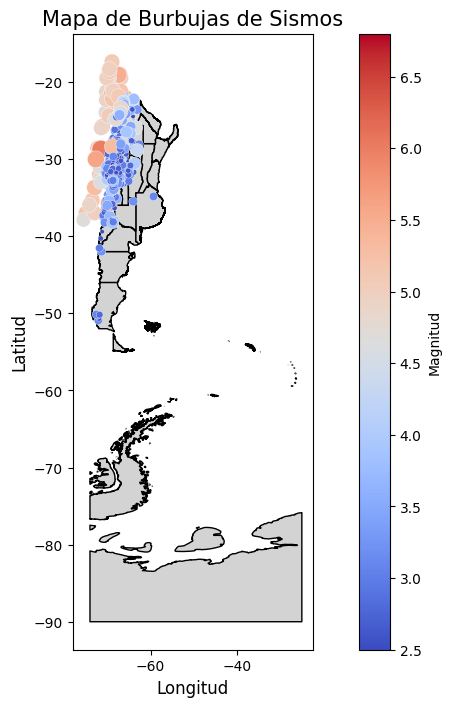

In [16]:
import sqlite3
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Conectar a la base de datos SQLite
conn = sqlite3.connect('sismos.db')
cursor = conn.cursor()

# Obtener los datos de los sismos
cursor.execute("SELECT latitud, longitud, magnitud FROM sismos WHERE fecha >= '2024-01-01'")
data = cursor.fetchall()

# Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(data, columns=['latitud', 'longitud', 'magnitud'])

# Leer el GeoJSON de provincias
gdf = gpd.read_file('..\..\data\provincias_corregido.geojson')

# Crear el gráfico de burbujas con Matplotlib y Seaborn
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotear las burbujas de los sismos
sns.scatterplot(x='longitud', y='latitud', size='magnitud', hue='magnitud', data=df, sizes=(10, 200), palette='coolwarm', ax=ax, legend=None)

# Personalizar el gráfico
plt.title('Mapa de Burbujas de Sismos', fontsize=15)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)

# Mostrar colorbar
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=df['magnitud'].min(), vmax=df['magnitud'].max()))
sm.set_array([])  # Se necesita para colorbar
plt.colorbar(sm, label='Magnitud')

# Mostrar el gráfico
plt.show()

# Cerrar la conexión
conn.close()


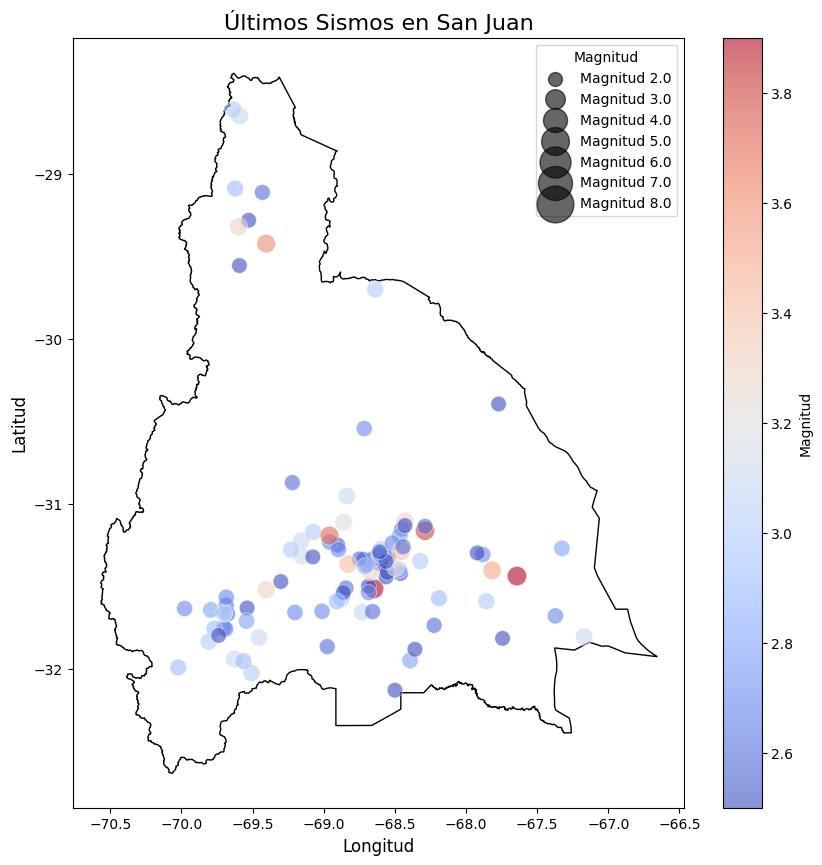

In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
from shapely.geometry import Point
import matplotlib as mpl

# Paso 1: Cargar el GeoJSON de provincias y filtrar San Juan
geojson_path = '..\..\data\provincias_corregido.geojson'
gdf = gpd.read_file(geojson_path)

# Filtrar la provincia de San Juan
san_juan = gdf[gdf['nam'] == 'San Juan']

# Paso 2: Consultar la base de datos SQLite para obtener los sismos en San Juan
conn = sqlite3.connect('sismos.db')
cursor = conn.cursor()

cursor.execute("""
SELECT fecha, hora, latitud, longitud, magnitud 
FROM sismos
WHERE provincia = 'SAN JUAN'
ORDER BY fecha DESC, hora DESC
LIMIT 100
""")

sismos = cursor.fetchall()

# Crear un DataFrame con los datos de los sismos
sismos_data = [(sismo[0], sismo[1], sismo[2], sismo[3], sismo[4]) for sismo in sismos]
df_sismos = pd.DataFrame(sismos_data, columns=["Fecha", "Hora", "Latitud", "Longitud", "Magnitud"])

# Cerrar la conexión a la base de datos
conn.close()

# Paso 3: Crear el gráfico de burbujas sobre el mapa de San Juan
fig, ax = plt.subplots(figsize=(10, 10))

# Mostrar el mapa de San Juan
san_juan.plot(ax=ax, color='white', edgecolor='black')

# Paso 4: Agregar los sismos al gráfico de burbujas
# Crear un gráfico de burbujas donde el tamaño de la burbuja es proporcional a la magnitud
scatter = ax.scatter(df_sismos['Longitud'], df_sismos['Latitud'], 
                     s=df_sismos['Magnitud']*50,  # Tamaño de la burbuja proporcional a la magnitud
                     c=df_sismos['Magnitud'],  # Colorear las burbujas según la magnitud
                     cmap='coolwarm', alpha=0.6, edgecolors="w", linewidth=0.5)

# Paso 5: Agregar la leyenda de la magnitud
# Usamos un "dummy" scatter con un tamaño representativo para la leyenda
legend_sizes = [2, 4, 6, 8, 10, 12, 14]  # Tamaños representativos para la leyenda
legend_labels = ['2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0']  # Magnitudes correspondientes

for size, label in zip(legend_sizes, legend_labels):
    ax.scatter([], [], s=size*50, c='black', alpha=0.6, label=f'Magnitud {label}')  # Burbujas "vacías" para la leyenda

# Agregar la barra de color
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Magnitud')

# Ajustar el título y etiquetas
plt.title("Últimos Sismos en San Juan", fontsize=16)
plt.xlabel("Longitud", fontsize=12)
plt.ylabel("Latitud", fontsize=12)

# Agregar la leyenda
plt.legend(title="Magnitud", loc="upper right", fontsize=10)

# Mostrar el mapa
plt.show()



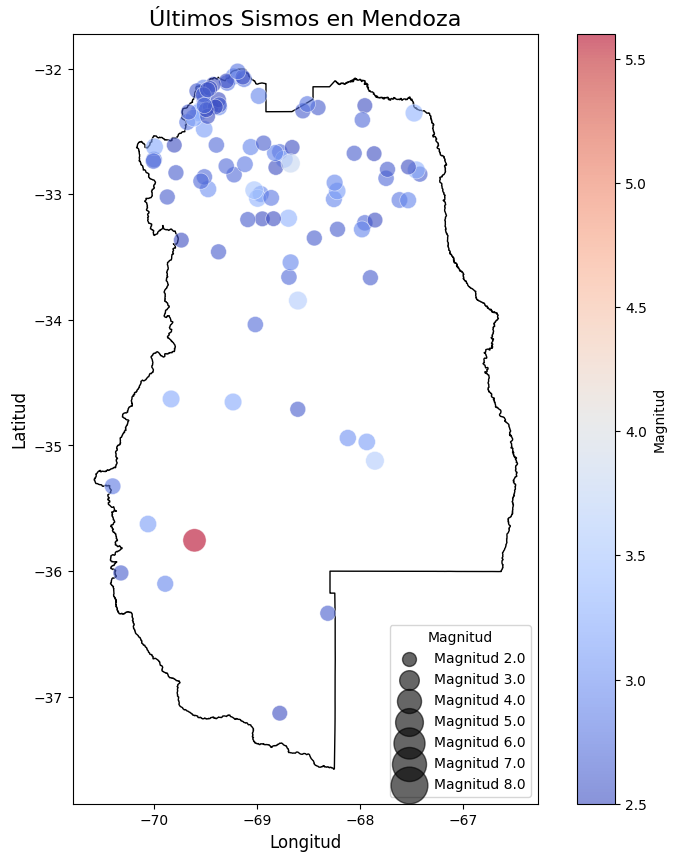

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
from shapely.geometry import Point
import matplotlib as mpl

# Paso 1: Cargar el GeoJSON de provincias y filtrar San Juan
geojson_path = '..\..\data\provincias_corregido.geojson'
gdf = gpd.read_file(geojson_path)

# Filtrar la provincia de mendoza
mendoza = gdf[gdf['nam'] == 'Mendoza']

# Paso 2: Consultar la base de datos SQLite para obtener los sismos en San Juan
conn = sqlite3.connect('sismos.db')
cursor = conn.cursor()

cursor.execute("""
SELECT fecha, hora, latitud, longitud, magnitud 
FROM sismos
WHERE provincia = 'MENDOZA'
ORDER BY fecha DESC, hora DESC
LIMIT 100
""")

sismos = cursor.fetchall()

# Crear un DataFrame con los datos de los sismos
sismos_data = [(sismo[0], sismo[1], sismo[2], sismo[3], sismo[4]) for sismo in sismos]
df_sismos = pd.DataFrame(sismos_data, columns=["Fecha", "Hora", "Latitud", "Longitud", "Magnitud"])

# Cerrar la conexión a la base de datos
conn.close()

# Paso 3: Crear el gráfico de burbujas sobre el mapa de San Juan
fig, ax = plt.subplots(figsize=(10, 10))

# Mostrar el mapa de San Juan
mendoza.plot(ax=ax, color='white', edgecolor='black')

# Paso 4: Agregar los sismos al gráfico de burbujas
# Crear un gráfico de burbujas donde el tamaño de la burbuja es proporcional a la magnitud
scatter = ax.scatter(df_sismos['Longitud'], df_sismos['Latitud'], 
                     s=df_sismos['Magnitud']*50,  # Tamaño de la burbuja proporcional a la magnitud
                     c=df_sismos['Magnitud'],  # Colorear las burbujas según la magnitud
                     cmap='coolwarm', alpha=0.6, edgecolors="w", linewidth=0.5)

# Paso 5: Agregar la leyenda de la magnitud
# Usamos un "dummy" scatter con un tamaño representativo para la leyenda
legend_sizes = [2, 4, 6, 8, 10, 12, 14]  # Tamaños representativos para la leyenda
legend_labels = ['2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0']  # Magnitudes correspondientes

for size, label in zip(legend_sizes, legend_labels):
    ax.scatter([], [], s=size*50, c='black', alpha=0.6, label=f'Magnitud {label}')  # Burbujas "vacías" para la leyenda

# Agregar la barra de color
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Magnitud')

# Ajustar el título y etiquetas
plt.title("Últimos Sismos en Mendoza", fontsize=16)
plt.xlabel("Longitud", fontsize=12)
plt.ylabel("Latitud", fontsize=12)

# Agregar la leyenda
plt.legend(title="Magnitud", loc="lower right", fontsize=10)

# Mostrar el mapa
plt.show()


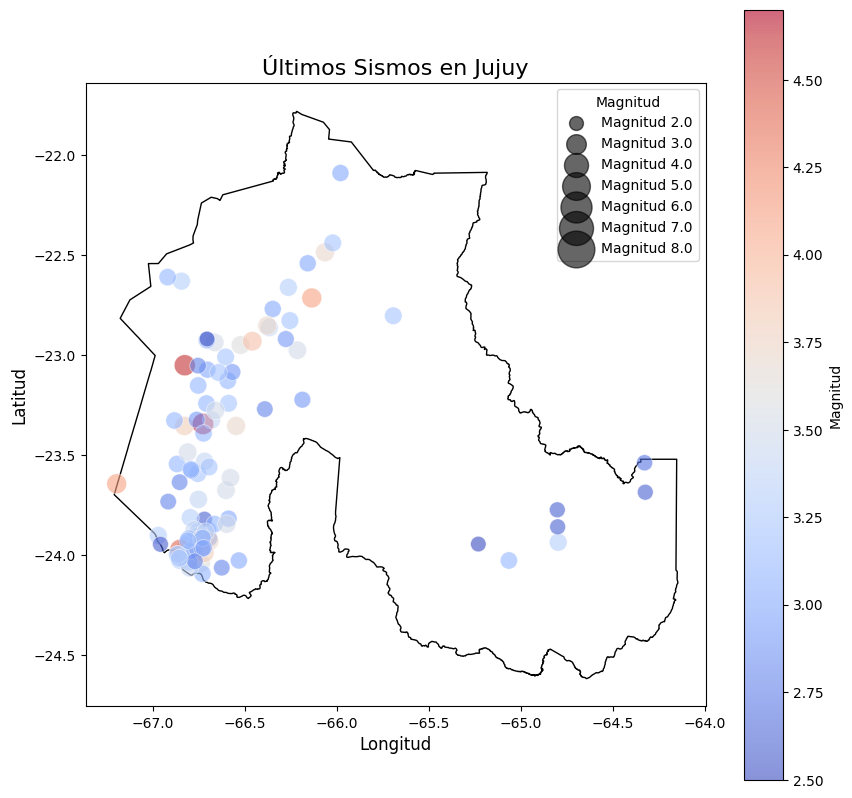

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
from shapely.geometry import Point
import matplotlib as mpl

# Paso 1: Cargar el GeoJSON de provincias y filtrar San Juan
geojson_path = '..\..\data\provincias_corregido.geojson'
gdf = gpd.read_file(geojson_path)

# Filtrar la provincia de mendoza
jujuy = gdf[gdf['nam'] == 'Jujuy']

# Paso 2: Consultar la base de datos SQLite para obtener los sismos en San Juan
conn = sqlite3.connect('..\..\data\sismos.db')
cursor = conn.cursor()

cursor.execute("""
SELECT fecha, hora, latitud, longitud, magnitud 
FROM sismos
WHERE provincia = 'JUJUY'
ORDER BY fecha DESC, hora DESC
LIMIT 100
""")

sismos = cursor.fetchall()

# Crear un DataFrame con los datos de los sismos
sismos_data = [(sismo[0], sismo[1], sismo[2], sismo[3], sismo[4]) for sismo in sismos]
df_sismos = pd.DataFrame(sismos_data, columns=["Fecha", "Hora", "Latitud", "Longitud", "Magnitud"])

# Cerrar la conexión a la base de datos
conn.close()

# Paso 3: Crear el gráfico de burbujas sobre el mapa de Jujuy
fig, ax = plt.subplots(figsize=(10, 10))

# Mostrar el mapa de San Juan
jujuy.plot(ax=ax, color='white', edgecolor='black')

# Paso 4: Agregar los sismos al gráfico de burbujas
# Crear un gráfico de burbujas donde el tamaño de la burbuja es proporcional a la magnitud
scatter = ax.scatter(df_sismos['Longitud'], df_sismos['Latitud'], 
                     s=df_sismos['Magnitud']*50,  # Tamaño de la burbuja proporcional a la magnitud
                     c=df_sismos['Magnitud'],  # Colorear las burbujas según la magnitud
                     cmap='coolwarm', alpha=0.6, edgecolors="w", linewidth=0.5)

# Paso 5: Agregar la leyenda de la magnitud
# Usamos un "dummy" scatter con un tamaño representativo para la leyenda
legend_sizes = [2, 4, 6, 8, 10, 12, 14]  # Tamaños representativos para la leyenda
legend_labels = ['2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0']  # Magnitudes correspondientes

for size, label in zip(legend_sizes, legend_labels):
    ax.scatter([], [], s=size*50, c='black', alpha=0.6, label=f'Magnitud {label}')  # Burbujas "vacías" para la leyenda

# Agregar la barra de color
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Magnitud')

# Ajustar el título y etiquetas
plt.title("Últimos Sismos en Jujuy", fontsize=16)
plt.xlabel("Longitud", fontsize=12)
plt.ylabel("Latitud", fontsize=12)

# Agregar la leyenda
plt.legend(title="Magnitud", loc="upper right", fontsize=10)

# Mostrar el mapa
plt.show()

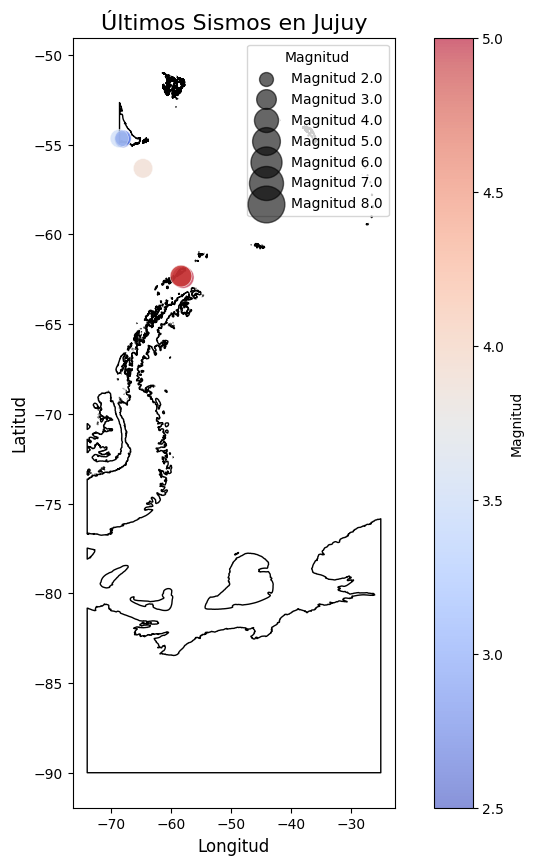

In [7]:



import geopandas as gpd
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
from shapely.geometry import Point
import matplotlib as mpl

# Paso 1: Cargar el GeoJSON de provincias y filtrar San Juan
geojson_path = '..\..\data\provincias_corregido.geojson'
gdf = gpd.read_file(geojson_path)

# Filtrar la provincia de mendoza
jujuy = gdf[gdf['nam'] == 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']

# Paso 2: Consultar la base de datos SQLite para obtener los sismos en San Juan
conn = sqlite3.connect('..\..\data\sismos.db')
cursor = conn.cursor()

cursor.execute("""
SELECT fecha, hora, latitud, longitud, magnitud 
FROM sismos
WHERE provincia = 'TIERRA DEL FUEGO'
ORDER BY fecha DESC, hora DESC
LIMIT 100
""")

sismos = cursor.fetchall()

# Crear un DataFrame con los datos de los sismos
sismos_data = [(sismo[0], sismo[1], sismo[2], sismo[3], sismo[4]) for sismo in sismos]
df_sismos = pd.DataFrame(sismos_data, columns=["Fecha", "Hora", "Latitud", "Longitud", "Magnitud"])

# Cerrar la conexión a la base de datos
conn.close()

# Paso 3: Crear el gráfico de burbujas sobre el mapa de Jujuy
fig, ax = plt.subplots(figsize=(10, 10))

# Mostrar el mapa de San Juan
jujuy.plot(ax=ax, color='white', edgecolor='black')

# Paso 4: Agregar los sismos al gráfico de burbujas
# Crear un gráfico de burbujas donde el tamaño de la burbuja es proporcional a la magnitud
scatter = ax.scatter(df_sismos['Longitud'], df_sismos['Latitud'], 
                     s=df_sismos['Magnitud']*50,  # Tamaño de la burbuja proporcional a la magnitud
                     c=df_sismos['Magnitud'],  # Colorear las burbujas según la magnitud
                     cmap='coolwarm', alpha=0.6, edgecolors="w", linewidth=0.5)

# Paso 5: Agregar la leyenda de la magnitud
# Usamos un "dummy" scatter con un tamaño representativo para la leyenda
legend_sizes = [2, 4, 6, 8, 10, 12, 14]  # Tamaños representativos para la leyenda
legend_labels = ['2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0']  # Magnitudes correspondientes

for size, label in zip(legend_sizes, legend_labels):
    ax.scatter([], [], s=size*50, c='black', alpha=0.6, label=f'Magnitud {label}')  # Burbujas "vacías" para la leyenda

# Agregar la barra de color
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Magnitud')

# Ajustar el título y etiquetas
plt.title("Últimos Sismos en Jujuy", fontsize=16)
plt.xlabel("Longitud", fontsize=12)
plt.ylabel("Latitud", fontsize=12)

# Agregar la leyenda
plt.legend(title="Magnitud", loc="upper right", fontsize=10)

# Mostrar el mapa
plt.show()

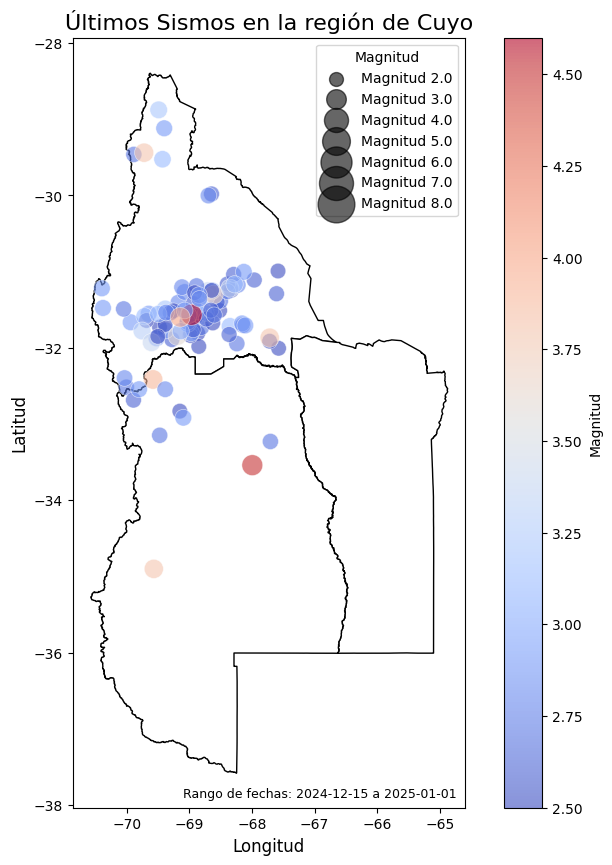

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
from shapely.geometry import Point
import matplotlib as mpl

# Paso 1: Cargar el GeoJSON de provincias y filtrar Cuyo
geojson_path = '..\..\data\provincias_corregido.geojson'
gdf = gpd.read_file(geojson_path)

# Filtrar la provincia de San Juan
san_juan = gdf[gdf['nam'] == 'San Juan']

# Filtrar la provincia de Mendoza
mendoza = gdf[gdf['nam'] == 'Mendoza']

# Filtrar la provincia de San Luis
san_luis = gdf[gdf['nam'] == 'San Luis']


# Paso 2: Consultar la base de datos SQLite para obtener los sismos en San Juan
conn = sqlite3.connect('..\..\data\sismos.db')
cursor = conn.cursor()

cursor.execute("""
WITH sismos_filtrados AS (
    SELECT fecha, hora, latitud, longitud, magnitud, provincia
    FROM sismos
    WHERE provincia = 'SAN JUAN' OR provincia = 'SAN LUIS' OR provincia = 'MENDOZA'
    ORDER BY fecha DESC, hora DESC
    LIMIT 100
),
rango AS (
    SELECT MIN(fecha) AS fecha_min, MAX(fecha) AS fecha_max
    FROM sismos_filtrados
)
SELECT 
    fecha, 
    hora, 
    latitud, 
    longitud, 
    magnitud, 
    provincia
FROM sismos_filtrados;

""")

sismos = cursor.fetchall()

# Obtener el rango de fechas
cursor.execute("""
WITH sismos_filtrados AS (
    SELECT fecha, hora, latitud, longitud, magnitud, provincia
    FROM sismos
    WHERE provincia = 'SAN JUAN' OR provincia = 'SAN LUIS' OR provincia = 'MENDOZA'
    ORDER BY fecha DESC, hora DESC
    LIMIT 100
),
rango AS (
    SELECT MIN(fecha) AS fecha_min, MAX(fecha) AS fecha_max
    FROM sismos_filtrados
)
SELECT fecha_min || ' a ' || fecha_max FROM rango;
""")

# Obtener el rango de fechas como string
rango_fechas = cursor.fetchone()[0]  # Esto toma el primer (y único) valor de la fila

# Crear un DataFrame con los datos de los sismos
sismos_data = [(sismo[0], sismo[1], sismo[2], sismo[3], sismo[4]) for sismo in sismos]
df_sismos = pd.DataFrame(sismos_data, columns=["Fecha", "Hora", "Latitud", "Longitud", "Magnitud"])

# Cerrar la conexión a la base de datos
conn.close()

# Paso 3: Crear el gráfico de burbujas sobre el mapa de San Juan
fig, ax = plt.subplots(figsize=(10, 10))

# Mostrar el mapa de San Juan
san_juan.plot(ax=ax, color='white', edgecolor='black')
san_luis.plot(ax=ax, color='white', edgecolor='black')
mendoza.plot(ax=ax, color='white', edgecolor='black')

# Paso 4: Agregar los sismos al gráfico de burbujas
# Crear un gráfico de burbujas donde el tamaño de la burbuja es proporcional a la magnitud
scatter = ax.scatter(df_sismos['Longitud'], 
                     df_sismos['Latitud'], 
                     s=df_sismos['Magnitud']*50,  # Tamaño de la burbuja proporcional a la magnitud
                     c=df_sismos['Magnitud'],  # Colorear las burbujas según la magnitud
                     cmap='coolwarm', alpha=0.6, edgecolors="w", linewidth=0.5)
# Paso 5: Agregar la leyenda de la magnitud
# Usamos un "dummy" scatter con un tamaño representativo para la leyenda
legend_sizes = [2, 4, 6, 8, 10, 12, 14]  # Tamaños representativos para la leyenda
legend_labels = ['2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0']  # Magnitudes correspondientes

for size, label in zip(legend_sizes, legend_labels):
    ax.scatter([], [], s=size*50, c='black', alpha=0.6, label=f'Magnitud {label}')  # Burbujas "vacías" para la leyenda

# Agregar la barra de color
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Magnitud')

# Ajustar el título y etiquetas
plt.title("Últimos Sismos en la región de Cuyo", fontsize=16)
plt.xlabel("Longitud", fontsize=12)
plt.ylabel("Latitud", fontsize=12)

# Agregar la leyenda
plt.legend(title="Magnitud", loc="upper right", fontsize=10)
# Mostrar el rango de fechas como texto
plt.text(0.98, 0.01, f"Rango de fechas: {rango_fechas}", transform=ax.transAxes, fontsize=9, ha="right", va="bottom", bbox=dict(facecolor='none', alpha=0.7, edgecolor='none', boxstyle='round,pad=1'))


# Mostrar el mapa
plt.show()